# Import Packages

In [1]:
import numpy as np
import numpy.matlib
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from mpl_toolkits import mplot3d
import scipy.ndimage as rotate
import random

# Load training data

In [2]:
# Import the training data
train = np.genfromtxt('letter.csv', delimiter=",")
train.shape

(7744, 7000)

# Load training labels

In [3]:
# Import labels for test purposes
trainlabels = np.genfromtxt('letterslabels.csv',dtype='str')
# See what data is in set
print(set(trainlabels),len(set(trainlabels)))
# And its shape
print(train.shape)

# Turn letters to numbers to facilitate ndarrys and plots
trainlabels_nums = trainlabels.copy()  #deep copy

trainlabels_nums[trainlabels_nums == 'A'] = 0
trainlabels_nums[trainlabels_nums == 'B'] = 1
trainlabels_nums[trainlabels_nums == 'C'] = 2
trainlabels_nums[trainlabels_nums == 'D'] = 3
trainlabels_nums[trainlabels_nums == 'E'] = 4
trainlabels_nums[trainlabels_nums == 'F'] = 5
trainlabels_nums[trainlabels_nums == 'G'] = 6
trainlabels_nums[trainlabels_nums == 'H'] = 7
trainlabels_nums[trainlabels_nums == 'I'] = 8
trainlabels_nums[trainlabels_nums == 'J'] = 9

# Set type
trainlabels_nums = trainlabels_nums.astype(int)

{'I', 'C', 'F', 'D', 'B', 'E', 'G', 'J', 'H', 'A'} 10
(7744, 7000)


In [4]:
# Data distribution
Counter(trainlabels)

Counter({'J': 700,
         'C': 700,
         'B': 700,
         'H': 700,
         'D': 700,
         'G': 700,
         'A': 700,
         'I': 700,
         'E': 700,
         'F': 700})

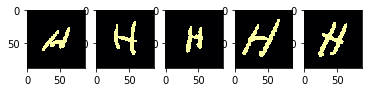

In [5]:
# Print the first 5 examples of the letter H
h_exmaple = train[:,trainlabels == 'H']
for i in range(1,6):
    plt.subplot(1,5,i)
    plt.imshow((h_exmaple[:,i].reshape((88,88)).T), cmap='inferno')
plt.show()

# Perform PCA to visualise dataset

In [6]:
"""
Here I will produce a 3D representation of the clusters
"""

# Generate the Zero mean covarince matrix
mean_subtract = train - np.mean(train, axis=0)
c = np.cov(mean_subtract, rowvar=True)

# Calculate the eigenvalues, eigenvectors and sort the order occordiingly
eigenValues, eigenVectors = np.linalg.eigh(c)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

# Reduce dimensions of the data to the 3 most varied/important
h = np.dot(eigenVectors[:,:3].T, mean_subtract).T

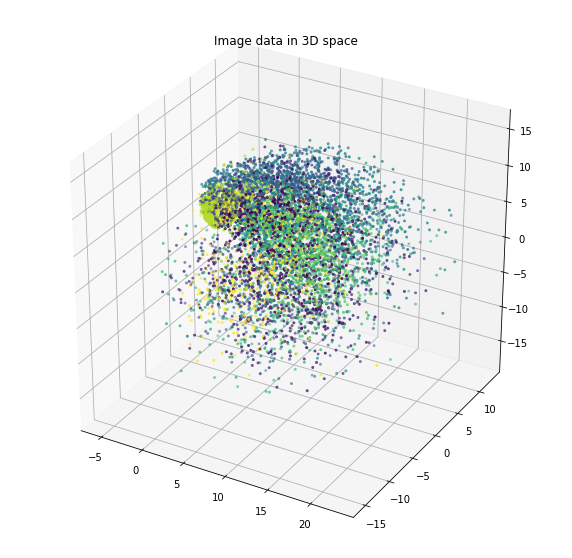

In [7]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
label = ['H', 'B', 'G', 'E', 'F', 'A', 'C', 'D', 'I', 'J']
colour = np.arange(0,10,1)
zdata = h[:,0]
xdata = h[:,1]
ydata = h[:,2]
ax.scatter3D(xdata, ydata, zdata, s=4, c=trainlabels_nums)

ax.set_title("Image data in 3D space")
fig.savefig("figures/3d_one")
plt.show()


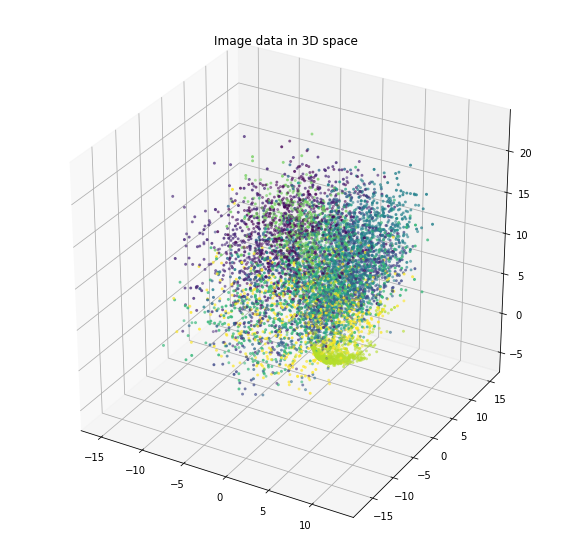

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
zdata = h[:,1]
xdata = h[:,2]
ydata = h[:,0]
ax.scatter3D(xdata, ydata, zdata, s=4, c=trainlabels_nums)
ax.set_title("Image data in 3D space")
fig.savefig("figures/3d_two")
plt.show()

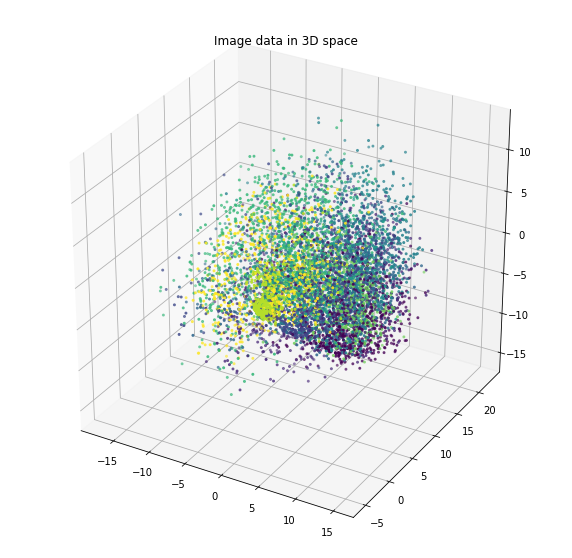

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
zdata = h[:,2]
xdata = h[:,0]
ydata = h[:,1]
ax.scatter3D(xdata, ydata, zdata, s=4, c=trainlabels_nums)
ax.set_title("Image data in 3D space")
fig.savefig("figures/3d_three")
plt.show()

# Optimisation fucntions

In [13]:
def bias(c, k, counter, eta, x, W, t):
    """
    This function returns the bias adjust weight for a given prototype

    c -- Prototype bias coefficent
    counter -- ndarry containing the number times a prototype has been 'hit'
    eta -- Learning rate
    x -- sample pattern
    W -- ANN

    """
    b = c * ((len(W)**(-1)) - counter[k]/t)
    return eta * ((x - W[k,:]) + b)

def init_bias(W):
    """
    This function returns a biased ANN where each prototype is set to an example

    """
    #  For every prototype
    for i in range(0,digits):
        # Set the normised sample as the neuron w 
        r = np.random.randint(0,m)
        sample = train[:,r].copy()      
        
        sample = sample / np.linalg.norm(sample, ord=2, axis=0)
        W[i,:] += sample
    return W / np.linalg.norm(W, ord=2, axis=0)

def rotation(sample, rotation_limit):
    """
    This function rotates the pattern within a given range

    """
    # Get a random angle within the range +- rotation_limit    
    angle = np.random.uniform(-rotation_limit,rotation_limit)
    sample = rotate.rotate(np.reshape(sample, (88,88)), angle, reshape=False)
    sample = np.reshape(sample, n) # Back to a 1 by n vector
    return sample

def matching_matrix(W,digits):
    """
    Produces a matching matix

    """
    match = np.zeros((len(set(trainlabels)), digits))
    for i in range(0,m):
        sample = train[:,i] / np.linalg.norm(train[:,i], axis=0)
        vals = W @ sample
        match[trainlabels_nums[i], np.argmax(vals)] += 1
    return match

# Run Experiments

To start an experiment, set the parameter to True in the params dictionary. In each test function, you can set the seed range using the variables seed_start and seed_end. As well as produce the figures by setting the variable print_images to True.

The report used the seeds seed_start=0,seed_end=5, but the default is 0 and 10 respectivly

Results


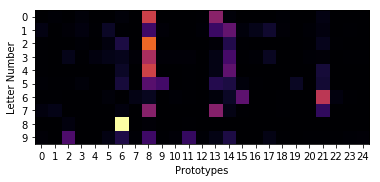

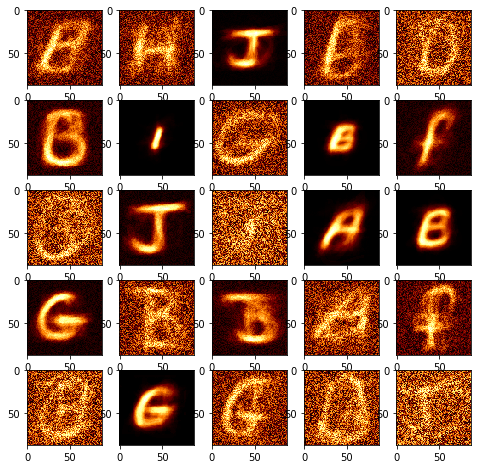

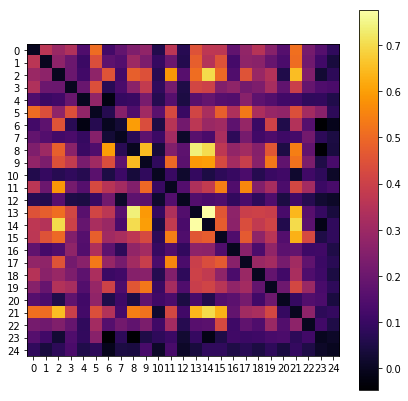

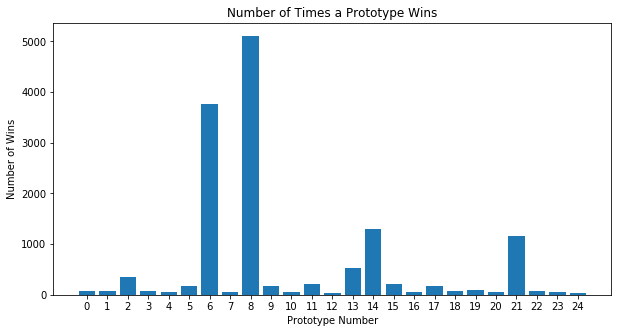

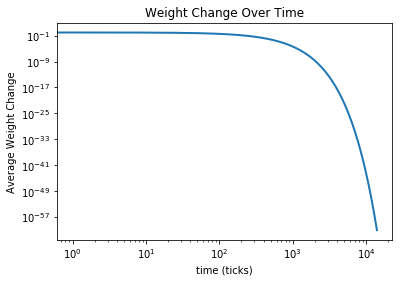

Results


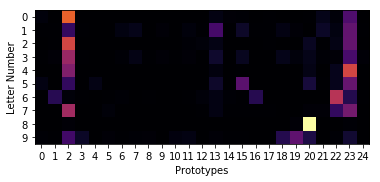

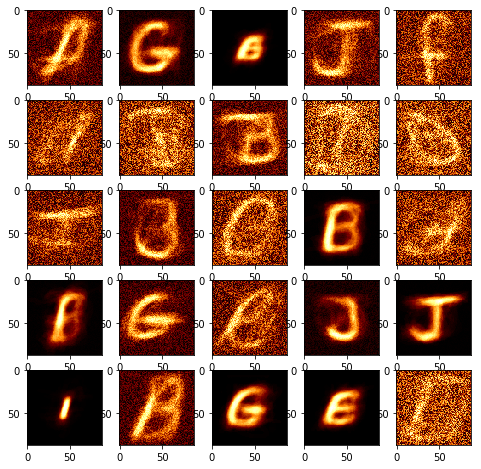

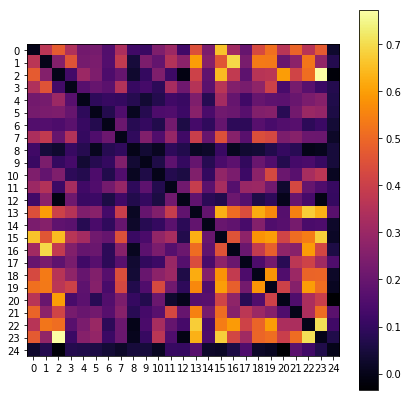

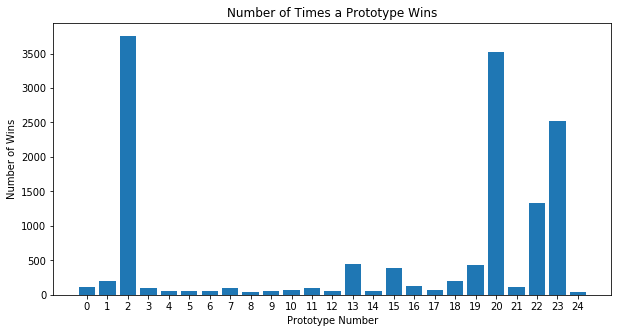

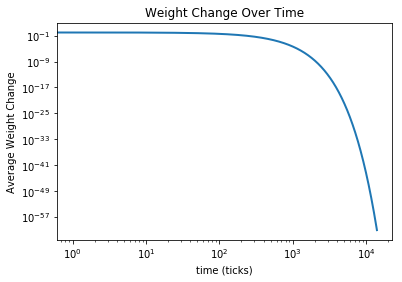

Results


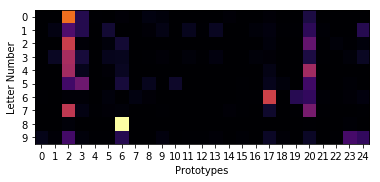

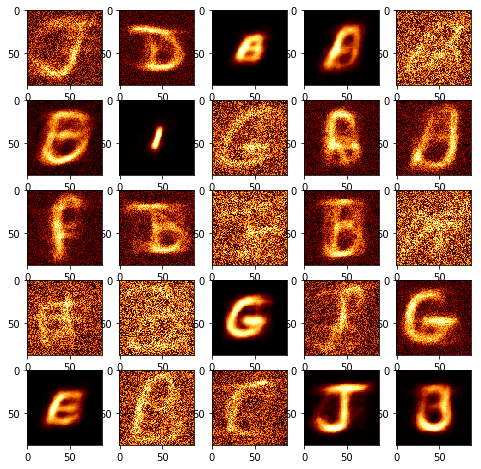

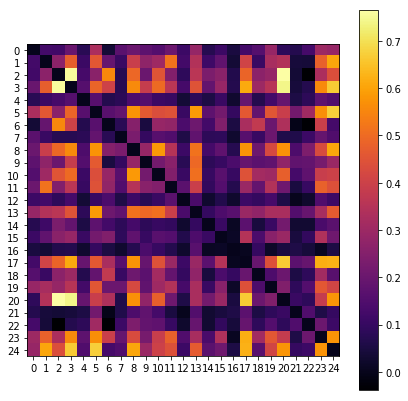

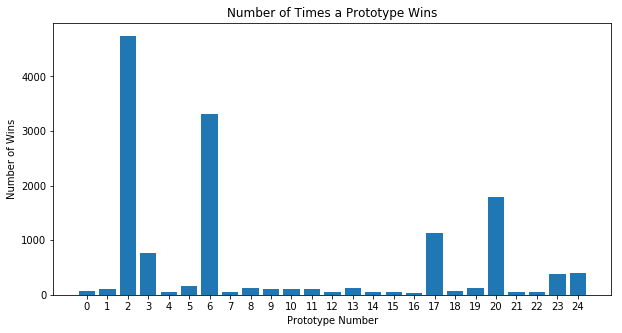

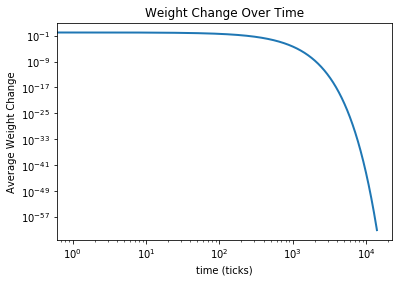

Results


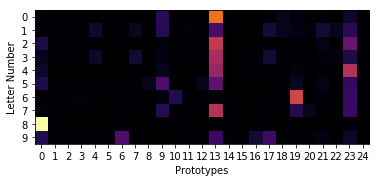

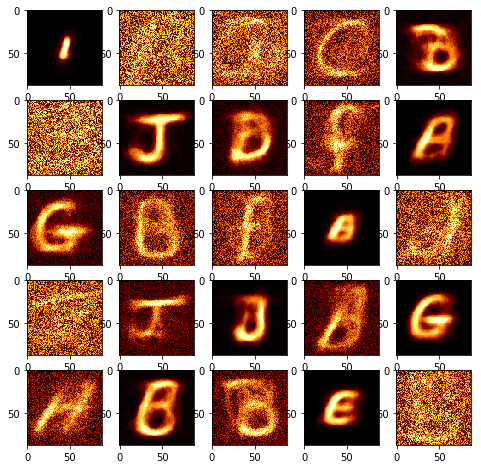

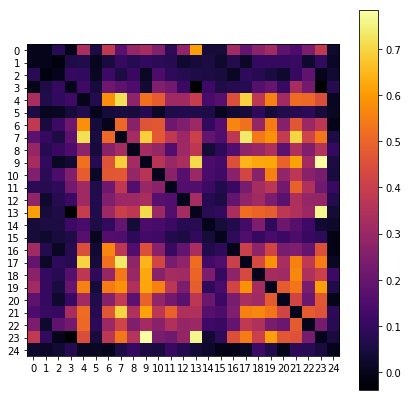

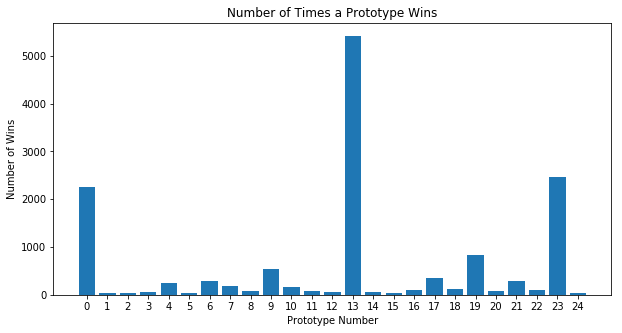

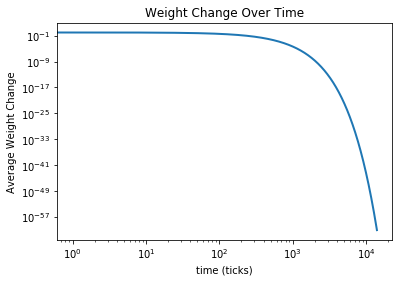

Results


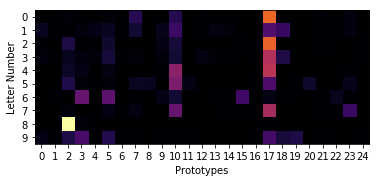

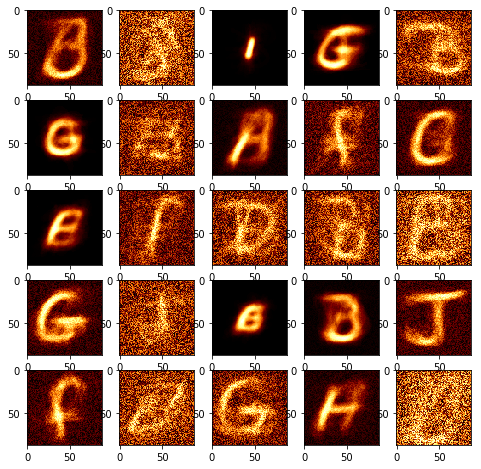

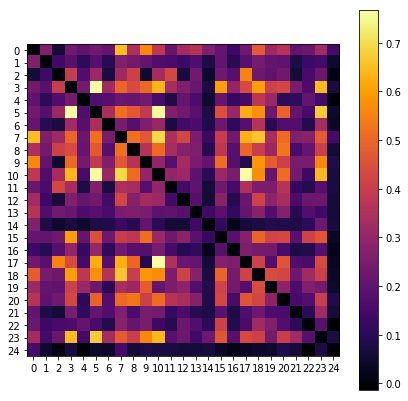

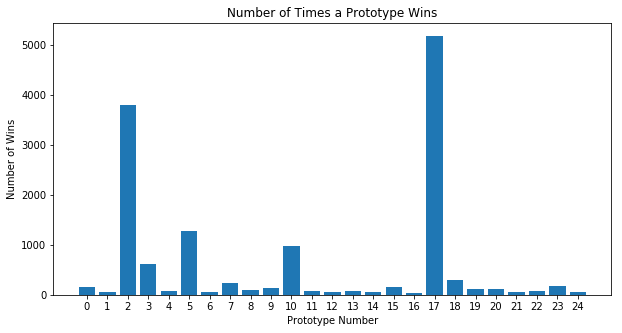

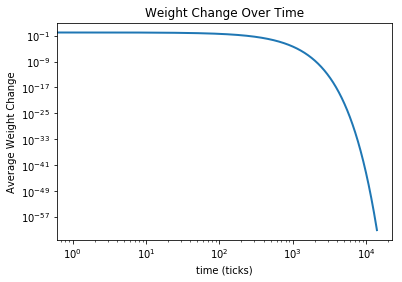

[(18.2, 0.3985142857142857)]


In [14]:
# Number of patterns used for online learning
tmax   = 14000

# Number of prototypes
digits = 25

# shape/size of the dataset
[n,m]  = np.shape(train)

# Learing rate
eta    = 0.01

# Initial dimention weight
winit  = 1

# Weight change over time discount value
alpha = 0.99

# A limit to the amount of rotation permitted for it pattern
rotation_limit = 2

# prototype bias coefficent
c = 0.01

# noise filter 
noise_limit = 0.08

# leaky value 
leaky = 1e-05

# Dead unit filter
dead_unit = 0.5 * digits**(-1)

def competitve_learn(params, seed_start=0,seed_end=10, print_images=False):
    """
    Perform competitve learning, using the provided seeds
    
    returns the resulting result_dead, result_purity ndarrys
    
    """
    # Experiment Parameters
    rotation_run = params["rotation_run"]
    # num_neighbor = True
    weight_bias = params["weight_bias"]
    leaky_run = params["leaky"]
    bias_run = params["bias_run"]
    noise_run = params["noise_run"]
    
    result_dead = np.zeros(seed_end - seed_start)
    result_purity = np.zeros(seed_end - seed_start)
    
    # For each seed     
    for i,j in enumerate(range(seed_start, seed_end)):
        numpy.random.seed(j)
        
        # init and normalise weights
        W = winit * np.random.rand(digits,n)         
        normW = np.sqrt(np.diag(W.dot(W.T)))
        normW = normW.reshape(digits,-1)            
        W = W / normW

        # init counters
        counter = np.zeros(digits)              
        wCount = np.ones((1,tmax+1))
                
        if weight_bias:
            W = init_bias(W)
        
        # Learn for tmax iterations         
        for t in range(1,tmax + 1):
            
            #Get a random pattern
            r = np.random.randint(0,m)
            x = train[:,r]
    
            sample = x.copy()
            
            # Apply and presynaptic processes
            if rotation_run:
                sample = rotation(sample,rotation_limit)

            if noise_run:
                sample += noise_limit * np.random.rand(n)
            
            # Normalise patter
            sample /= np.linalg.norm(sample, ord=2)
            
            # Activation function
            y = np.dot(W,sample.T)
            k = np.argmax(y)
            
            # Increment win counter
            counter[k] += 1
            
            # Apply winner bias             
            if bias_run: 
                dw = bias(c, k, counter, eta, sample.T, W,t)
                W[k,:] += dw
            else:
                dw = eta * (sample.T - W[k,:])
                W[k,:] += dw

        #     if num_neighbor:
        #         W[k,:] = eta * (sample - W[k,:])
        #         number_n = 1
        #         W[:k][-number_n:] += eta * (sample - W[:k][-number_n:])
        #         W[k+1:number_n+k+1] += eta * (sample - W[k+1:number_n+k+1])
            
            # Postsynaptic processing            
            if leaky_run:
                W[:k,:] += (sample.T - W[:k,:]) * leaky
                W[k+1:,:] += (sample.T - W[k+1:,:]) * leaky

            # Moving average          
            wCount[0,t] = wCount[0,t-1] * (alpha + dw.dot(dw.T)*(1-alpha)) # % weight change over time (running avg)
         
        # calculate metrics
        result_dead[i] = sum(counter < t * dead_unit)
        match = matching_matrix(W,digits)
        result_purity[i] = np.max(match, axis=0).sum() / m
        
        #  Print figures if selected       
        if print_images == True:
            print("Results")
#             Confusion
            fig = plt.figure()
            plt.xticks(np.arange(len(W)))
            plt.yticks(np.arange((len(set(trainlabels)))))
            plt.ylabel('Letter Number')
            plt.xlabel('Prototypes')
            plt.imshow(match, cmap='inferno')
            plt.show()
#             Letters
            fig.savefig("figures/prototype_cof_after")
            f, axs = plt.subplots(5,5,figsize=(8,8))
            for i in range(0,len(W)):
                plt.subplot(5, 5,i+1)
                plt.imshow((W[i,:].reshape((88,88)).T), cmap='afmhot',interpolation='nearest')
            f.savefig("figures/prototype_p_after")
#             Corr
            fig2 = plt.figure(figsize=(7,7))
            corr = np.corrcoef(W)
            np.fill_diagonal(corr, 0)
            plt.xticks(np.arange(digits))
            plt.yticks(np.arange(digits))
            plt.imshow(corr, cmap='inferno')
            plt.colorbar()
            plt.show()
            fig2.savefig("figures/prototype_corr_after")
#             Hit chart
            fig3 = plt.figure(figsize=(10,5))
            plt.xticks(np.arange(digits))
            plt.title("Number of Times a Prototype Wins")
            plt.ylabel('Number of Wins')
            plt.xlabel('Prototype Number')
            plt.bar(range(digits), counter)
            plt.show()
            fig3.savefig("figures/PrototpyeWin_after")
#             Weight change
            fig4 = plt.figure()
            ax = fig4.add_subplot(111)
            ax.plot(wCount[0,0:tmax], linewidth=2.0)
            ax.set_xscale("log")
            ax.set_yscale("log")
            ax.set_ylabel('Average Weight Change')
            ax.set_xlabel('time (ticks)')
            ax.set_title("Weight Change Over Time")
            plt.show()
            fig4.savefig("figures/weight_change_after")
        
    return result_dead, result_purity 


"""
==================================================================================================================

                                        EDIT THESE PARAMS TO INITIATE TESTS

==================================================================================================================
"""
params = dict()
params["rotation_run"] = None
# num_neighbor = True
params["weight_bias"] = None
params["leaky"] = None
params["bias_run"] = None
params["noise_run"] = None
control = True
all_run = None

"""
==================================================================================================================

                                        EDIT THESE PARAMS TO INITIATE TESTS

To start an experiment, set the parameter to True in the params dictionary. In each test function, you can set the seed range using the variables seed_start and seed_end. As well as produce the figures by setting the variable print_images to True.
The report used the seeds seed_start=0,seed_end=5, but the default is 0 and 10 respectivly

==================================================================================================================
"""


a_exp = []
if all_run == True:
    params["rotation_run"] = True
    # num_neighbor = True
    params["weight_bias"] = True
    params["leaky"] = True
    params["bias_run"] = True
    params["noise_run"] = True
    res_a, res_ap = competitve_learn(params,seed_start=0,seed_end=5,print_images=True)
    a_exp.append((sum(res_a)/len(res_a), sum(res_ap)/len(res_ap)))
    print(a_exp)

c_exp = []
if params["bias_run"] == True:
    c_old = c
    for diff in np.arange(0.1, 1, 0.1):
        c = diff
        res_c, res_cp = competitve_learn(params,seed_start=0,seed_end=5)
        c_exp.append((diff, sum(res_c)/len(res_c), sum(res_cp)/len(res_cp)))
    print(c_exp)
    c = c_old

r_exp = []
if params["rotation_run"] == True:
    rotation_limit_old = rotation_limit
    for diff in np.arange(0, 11, 1):
        print(diff)
        rotation_limit = diff
        res_r, res_rp = competitve_learn(params,seed_start=0,seed_end=5)
        r_exp.append((diff, sum(res_r)/len(res_r), sum(res_rp)/len(res_rp)))
    print(r_exp)
    rotation_limit = rotation_limit_old
    
w_exp = []
if params["weight_bias"] == True:
    res_w, res_wp = competitve_learn(params,seed_start=0,seed_end=5)
    w_exp.append((sum(res_w)/len(res_w), sum(res_wp)/len(res_wp)))
    print(w_exp)

l_exp = []
if params["leaky"] == True:
    leaky_old = leaky
    for diff in np.arange(0.00001, 0.0001, 0.00001):
        print(diff)
        leaky = diff
        res_l, res_lp = competitve_learn(params, seed_start=0,seed_end=5)
        l_exp.append((diff, sum(res_l)/len(res_l), sum(res_lp)/len(res_lp)))
    print(l_exp)
    leaky = leaky_old
    
n_exp = []
if params["noise_run"] == True:
    noise_limit_old = noise_limit
    for diff in np.arange(0.01, 0.1, 0.01):
        print(diff)
        noise_limit = diff
        res_n, res_np = competitve_learn(params, seed_start=0,seed_end=5)
        n_exp.append((diff, sum(res_n)/len(res_n), sum(res_np)/len(res_np)))
    print(n_exp)
    noise_limit = noise_limit_old

con_exp = []
if control == True:
    res_con, res_conp = competitve_learn(params, seed_start=0,seed_end=5,print_images=True)
    con_exp.append((sum(res_con)/len(res_con), sum(res_conp)/len(res_conp)))
    print(con_exp)
    
    

# Tried to implement a way to use correlation to merge prototypes

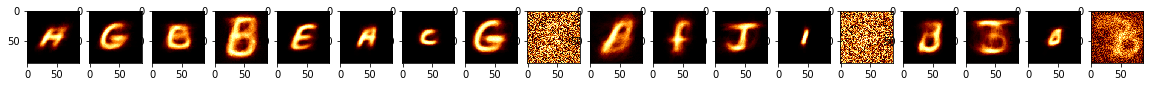

In [151]:
cor_lim = 0.77
w_copy = W.copy()
corr = np.corrcoef(w_copy)
np.fill_diagonal(corr, 0)
while np.amax(corr) > cor_lim:
    (i,j) = np.unravel_index(corr.argmax(), corr.shape)
    w_copy[i,:] += w_copy[j,:]
    w_copy = np.delete(w_copy, j, axis=0)
    corr = np.corrcoef(w_copy)
    np.fill_diagonal(corr, 0)

f, axs = plt.subplots(1,len(w_copy),figsize=(20,20))
for i in range(0,len(w_copy)):
    plt.subplot(1, len(w_copy),i+1)
    plt.imshow((W[i,:].reshape((88,88)).T), cmap='afmhot',interpolation='nearest')
f.savefig("figures/prototype_After")

# Tried to visulise cluster centers
As a comparison of the trainlabel centres

In [147]:
# mean_subtract = W - np.mean(W, axis=0)
# c = np.cov(mean_subtract, rowvar=False)

# eigenValues, eigenVectors = np.linalg.eigh(c)

# idx = eigenValues.argsort()[::-1]   
# eigenValues = eigenValues[idx]
# eigenVectors = eigenVectors[:,idx]

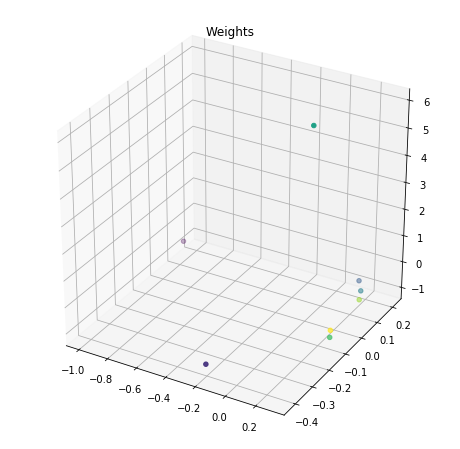

Text(0.5, 0.92, 'Labels')

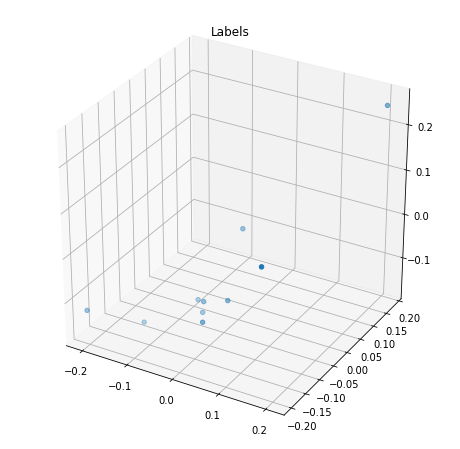

In [149]:
# h2 = np.dot(eigenVectors[:,:3].T, mean_subtract.T).T
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111, projection='3d')
# zdata = h2[:,0]
# xdata = h2[:,1]
# ydata = h2[:,2]
# ax.scatter3D(xdata, ydata, zdata, s=20, c = range(0,len(W)));
# ax.set_title("Weights")
# # ax.set_zlim(-0.5,0.5)
# # ax.set_xlim(-0.5,0.5)
# # ax.set_ylim(-0.5,0.5)
# plt.show()


# l = []

# for i in set(trainlabels):
#     co = h[trainlabels == i,:]
#     l.append([np.average(co[0]),np.average(co[1]),np.average(co[2])])

# l = np.array(l)

# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111, projection='3d')
# zdata = l[:,0]
# xdata = l[:,1]
# ydata = l[:,2]
# ax.scatter3D(xdata, ydata, zdata, s=20);
# ax.set_title("Labels")
# # ax.set_zlim(-0.5,0.5)
# # ax.set_xlim(-0.5,0.5)
# # ax.set_ylim(-0.5,0.5)
# # plt.show()